In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline 
from scipy import stats

In [2]:
train = pd.read_csv('../data/train_drop_col_row.csv')

In [3]:
test = pd.read_csv('../data/train_x_drop_col_row.csv')

In [4]:
print(train.shape)
print(test.shape)

(13602, 121)
(8122, 120)


In [8]:
train_x = train.drop(['y'],axis=1)

In [9]:
x = pd.concat([train_x,test])
x.shape

(21724, 120)

In [7]:
train.columns.values

array(['cust_id', 'cust_group', 'y', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5',
       'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14',
       'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22',
       'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30',
       'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38',
       'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46',
       'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54',
       'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62',
       'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70',
       'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78',
       'x_79', 'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86',
       'x_87', 'x_88', 'x_89', 'x_90', 'x_91', 'x_93', 'x_95', 'x_96',
       'x_97', 'x_98', 'x_99', 'x_100', 'x_101', 'x_139', 'x_140',
       'x_141', 'x_142', 'x_143', 'x_144', 'x_145', 'x_146', 'x_147',
      

In [10]:
##哑编码
column_dummy = ['x_1', 'x_2', 'x_3', 'x_4', 'x_5',
       'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14',
       'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22',
       'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30',
       'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38',
       'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46',
       'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54',
       'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62',
       'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70',
       'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78',
       'x_79', 'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86',
       'x_87', 'x_88', 'x_89', 'x_90', 'x_91', 'x_93', 'x_95', 'x_96',
       'x_97', 'x_98', 'x_99', 'x_100', 'x_101', 'x_139', 'x_140',
       'x_141', 'x_142', 'x_143', 'x_144', 'x_145', 'x_146', 'x_147',
       'x_148', 'x_149', 'x_150', 'x_151', 'x_152', 'x_153', 'x_154',
       'x_155', 'x_156', 'x_157']

for i in column_dummy:
    dummies_df = pd.get_dummies(x[i]).rename(columns=lambda x: i + str(x))
    x = pd.concat([x, dummies_df], axis=1)

In [11]:
x.shape

(21724, 17541)

In [12]:
train_X = x[0:13602]
test_X = x[13602:21724]
print(train_X.shape)
print(test_X.shape)

(13602, 17541)
(8122, 17541)


In [13]:
train_X['y'] = train['y']
print(train_X.shape)

(13602, 17542)


C:\Program Files\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [14]:
train_X.head()

,cust_id,cust_group,x_1,x_2,x_3,x_4,x_5,x_6,x_7,x_8,...,x_1562,x_1563,x_157-99,x_1571,x_1572,x_1573,x_1574,x_15710,x_15711,y
0,110000,group_3,0.354167,0.604988,-99,-99,-99,-99,-99,-99,...,0,1,1,0,0,0,0,0,0,0
1,110001,group_3,0.125000,0.012058,-99,-99,-99,-99,-99,-99,...,1,0,0,0,1,0,0,0,0,0
2,110002,group_3,0.333333,0.565979,0,0,0,0,0,0,...,1,0,0,0,1,0,0,0,0,0
3,110003,group_3,0.208333,0.316209,0,0,0,0,1,1,...,1,0,0,0,0,0,1,0,0,0
4,110004,group_3,0.208333,0.008061,-99,-99,-99,-99,-99,-99,...,1,0,0,1,0,0,0,0,0,0


In [15]:
train_X.to_csv('dummy_feature_train_xy.csv',index=False)

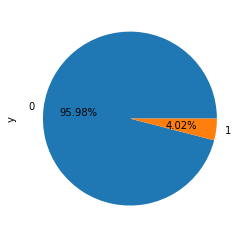

In [17]:
train_X['y'].value_counts().plot.pie(autopct = '%1.2f%%')

In [16]:
test_X.to_csv('dummy_feature_train_x.csv',index=False)

In [18]:
###woe特征
def woe_single(DF,Y,X):
    if X.nunique()>11:
        r = 0
        bad=Y.sum()      #坏客户数(假设因变量列为1的是坏客户)
        good=Y.count()-bad  #好客户数
        n=5
        while np.abs(r) < 1:
            d1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.qcut(X, n,duplicates='drop')})
            d2 = d1.groupby('Bucket', as_index = False)
            r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
            n = n - 1
        d3 = pd.DataFrame(d2.X.min(), columns = ['min'])
        d3['min']=d2.min().X    
        d3['max'] = d2.max().X
        d3['sum'] = d2.sum().Y
        d3['total'] = d2.count().Y
        d3['bad_rate'] = d2.mean().Y
        d3['group_rate']=d3['total']/(bad+good)
        d3['woe']=np.log((d3['bad_rate']/(1-d3['bad_rate']))/(bad/good))
        d3['iv']=(d3['sum']/bad-((d3['total']-d3['sum'])/good))*d3['woe']
        iv=d3['iv'].sum()
        if iv!=0.0 and len(d2)>1:
            d3['iv_sum']=iv
            woe=list(d3['woe'].round(6))
            cut=list(d3['min'].round(6))
            cut1=list(d3['max'].round(6))
            cut.append(cut1[-1]+1)
            x_woe=pd.cut(X,cut,right=False,labels=woe)
            return  d3,cut,woe,iv,x_woe
        else:
            dn1 = pd.DataFrame({"X": X, "Y": Y, "Bucket": pd.cut(X, 100)})
            dn2 = dn1.groupby('Bucket', as_index = False)
            dn3 = pd.DataFrame(dn2.X.min(), columns = ['min'])
            dn3['min']=dn2.min().X    
            dn3['max'] = dn2.max().X
            dn3['sum'] = dn2.sum().Y
            dn3['total'] = dn2.count().Y
            while (1):
                    if  (len(dn3)>4):
                        dn3_min_index = dn3[dn3.total == min(dn3.total)].index.values[0]
                        if (dn3_min_index!=0):    #最小值非第一行的情况
                            dn3.iloc[dn3_min_index-1, 1] =dn3.iloc[dn3_min_index, 1] 
                            dn3.iloc[dn3_min_index-1, 2] = dn3.iloc[dn3_min_index, 2] +dn3.iloc[dn3_min_index-1, 2]
                            dn3.iloc[dn3_min_index-1, 3] = dn3.iloc[dn3_min_index, 3] +dn3.iloc[dn3_min_index-1, 3]
                            dn3=dn3.drop([dn3_min_index])
                            dn3= dn3.reset_index(drop=True)
                        else:    #最小值是第一行的情况
                            dn3.iloc[dn3_min_index+1, 0] =dn3.iloc[dn3_min_index, 0] 
                            dn3.iloc[dn3_min_index+1, 2] = dn3.iloc[dn3_min_index, 2] +dn3.iloc[dn3_min_index+1, 2]
                            dn3.iloc[dn3_min_index+1, 3] = dn3.iloc[dn3_min_index, 3] +dn3.iloc[dn3_min_index+1, 3]
                            dn3=dn3.drop([dn3_min_index])
                            dn3= dn3.reset_index(drop=True)
                    else:
                        break
            dn3['bad_rate'] =dn3['sum']/dn3['total']
            dn3['group_rate']=dn3['total']/(bad+good)
            dn3['woe']=np.log((dn3['bad_rate']/(1-dn3['bad_rate']))/(bad/good))
            dn3['iv']=(dn3['sum']/bad-((dn3['total']-dn3['sum'])/good))*dn3['woe']
            
            iv=dn3['iv'].sum()
            dn3['iv_sum']=iv
            woe=list(dn3['woe'].round(6)) 
            cut=list(dn3['min'].round(6))
            cut1=list(dn3['max'].round(6))
            cut.append(cut1[-1]+1)
            x_woe=pd.cut(X,cut,right=False,labels=woe)
            return  dn3,cut,woe,iv,x_woe
    else : 
        bad=Y.sum()      #坏客户数
        good=Y.count()-bad  #好客户数
        d1 = pd.DataFrame({"X": X, "Y": Y})
        d2 = d1.groupby('X', as_index =True)
        d3 = pd.DataFrame()
        
        d3['sum'] = d2.sum().Y
        d3['total'] = d2.count().Y
        for c in range(d3.shape[0])[::-1]:
            if ((d3.iloc[c,1]-d3.iloc[c,0])==0) or (d3.iloc[c,0]==0):
                d3.iloc[c-1,0]=d3.iloc[c-1,0]+d3.iloc[c,0]
                d3.iloc[c-1,1]=d3.iloc[c-1,1]+d3.iloc[c,1]
                d3.drop(d3.index[c],inplace=True)
            else:
                continue
        
        d3['min']=d3.index  
        d3['max'] = d3.index
        d3['bad_rate'] =d3['sum']/d3['total']
        d3['group_rate']=d3['total']/(bad+good)
        d3['woe']=np.log((d3['bad_rate']/(1-d3['bad_rate']))/(bad/good))
        d3['iv']=(d3['sum']/bad-((d3['total']-d3['sum'])/good))*d3['woe']
        iv=d3['iv'].sum()
        d3['iv_sum']=iv
        d3=d3[['min','max','sum','total','bad_rate','group_rate','woe','iv','iv_sum']]
        
        
        woe=list(d3['woe'].round(6))
        cut=list(d3.index)
        x_woe=X.replace(cut,woe)
        return d3,cut,woe,iv,x_woe

In [28]:
train_x = train.drop(['x_89','x_93','x_95'],axis =1)

In [29]:
train['x_95']

0         0.436170
1         0.297872
2         0.372340
3         0.053191
4         0.095745
5         0.148936
6         0.382979
7         0.180851
8         0.074468
9         0.255319
10        0.734043
11        0.170213
12        0.170213
13        0.500000
14        0.276596
15        0.340426
16        0.170213
17        0.382979
18        0.053191
19        0.202128
20        0.106383
21        0.680851
22        0.351064
23      -99.000000
24        0.170213
25        0.180851
26        0.627660
27        0.106383
28        0.446809
29        0.755319
           ...    
13572     0.680851
13573     0.404255
13574     0.308511
13575     0.606383
13576     0.361702
13577     0.361702
13578     0.414894
13579     0.361702
13580     0.117021
13581     0.404255
13582     0.382979
13583     0.414894
13584     0.808511
13585     0.712766
13586     0.265957
13587     0.680851
13588     0.244681
13589     0.627660
13590     0.265957
13591     0.202128
13592     0.234043
13593     0.

In [40]:
iv_all = []
for i in range(1,158):
    col = 'x'+'_'+str(i)
    print(col)
    print('**********')
    if col in train_x.columns.values:
        print(col)
        print('$$$$$$$$$$')
        X = train_x[col]
        iv =  woe_single(train_x,train_x.y,X)[3]
        iv_all.append(iv)        

x_1
**********
x_1
$$$$$$$$$$
x_2
**********
x_2
$$$$$$$$$$
x_3
**********
x_3
$$$$$$$$$$
x_4
**********
x_4
$$$$$$$$$$
x_5
**********
x_5
$$$$$$$$$$
x_6
**********
x_6
$$$$$$$$$$
x_7
**********
x_7
$$$$$$$$$$
x_8
**********
x_8
$$$$$$$$$$
x_9
**********
x_9
$$$$$$$$$$
x_10
**********
x_10
$$$$$$$$$$
x_11
**********
x_11
$$$$$$$$$$
x_12
**********
x_12
$$$$$$$$$$
x_13
**********
x_13
$$$$$$$$$$
x_14
**********
x_14
$$$$$$$$$$
x_15
**********
x_15
$$$$$$$$$$
x_16
**********
x_16
$$$$$$$$$$
x_17
**********
x_17
$$$$$$$$$$
x_18
**********
x_18
$$$$$$$$$$
x_19
**********
x_19
$$$$$$$$$$
x_20
**********
x_20
$$$$$$$$$$
x_21
**********
x_21
$$$$$$$$$$
x_22
**********
x_22
$$$$$$$$$$
x_23
**********
x_23
$$$$$$$$$$
x_24
**********
x_24
$$$$$$$$$$
x_25
**********
x_25
$$$$$$$$$$
x_26
**********
x_26
$$$$$$$$$$
x_27
**********
x_27
$$$$$$$$$$
x_28
**********
x_28
$$$$$$$$$$
x_29
**********
x_29
$$$$$$$$$$
x_30
**********
x_30
$$$$$$$$$$
x_31
**********
x_31
$$$$$$$$$$
x_32
**********
x_32
$$$$$

In [41]:
iviv = pd.DataFrame(iv_all)

In [42]:
iviv

,0
0,0.014330
1,0.008230
2,0.142508
3,0.157673
4,0.160702
5,0.142492
6,0.235565
7,0.265917
8,0.145211
9,0.154975


In [43]:
iviv.columns = ['iv']

In [44]:
aa = iviv[iviv.iv>0.02]

In [45]:
aa.shape

(101, 1)

In [46]:
aa

,iv
2,0.142508
3,0.157673
4,0.160702
5,0.142492
6,0.235565
7,0.265917
8,0.145211
9,0.154975
10,0.155253
11,0.145172


In [50]:
np.array(iviv.iv)

array([0.01433045, 0.00822979, 0.14250822, 0.15767271, 0.16070201,
       0.14249238, 0.2355655 , 0.26591722, 0.14521082, 0.15497532,
       0.15525331, 0.14517174, 0.24399771, 0.25450171, 0.14254536,
       0.1610757 , 0.15130971, 0.14249238, 0.25392164, 0.26193705,
       0.14517174, 0.15489927, 0.14517174, 0.27643831, 0.14254536,
       0.16110169, 0.16080431, 0.14249238, 0.14027735, 0.13958204,
       0.14517174, 0.1614905 , 0.15644728, 0.14517174, 0.18942682,
       0.18800187, 0.15673193, 0.28466877, 0.22682747, 0.41254442,
       0.32857291, 0.12461392, 0.19467278, 0.22394503, 0.1443279 ,
       0.25819756, 0.17893846, 0.04024157, 0.00196115, 0.18357232,
       0.30958973, 0.29415167, 0.33587353, 0.15542169, 0.19835067,
       0.21881392, 0.16021132, 0.08972257, 0.09015788, 0.15764378,
       0.18266489, 0.25285018, 0.24243243, 0.1822766 , 0.22036515,
       0.23791938, 0.27808418, 0.37549146, 0.32629029, 0.04733034,
       0.04768453, 0.09817676, 0.09524105, 0.08311285, 0.08286

In [48]:
train.columns.values

array(['cust_id', 'cust_group', 'y', 'x_1', 'x_2', 'x_3', 'x_4', 'x_5',
       'x_6', 'x_7', 'x_8', 'x_9', 'x_10', 'x_11', 'x_12', 'x_13', 'x_14',
       'x_15', 'x_16', 'x_17', 'x_18', 'x_19', 'x_20', 'x_21', 'x_22',
       'x_23', 'x_24', 'x_25', 'x_26', 'x_27', 'x_28', 'x_29', 'x_30',
       'x_31', 'x_32', 'x_33', 'x_34', 'x_35', 'x_36', 'x_37', 'x_38',
       'x_39', 'x_40', 'x_41', 'x_42', 'x_43', 'x_44', 'x_45', 'x_46',
       'x_47', 'x_48', 'x_49', 'x_50', 'x_51', 'x_52', 'x_53', 'x_54',
       'x_55', 'x_56', 'x_57', 'x_58', 'x_59', 'x_60', 'x_61', 'x_62',
       'x_63', 'x_64', 'x_65', 'x_66', 'x_67', 'x_68', 'x_69', 'x_70',
       'x_71', 'x_72', 'x_73', 'x_74', 'x_75', 'x_76', 'x_77', 'x_78',
       'x_79', 'x_80', 'x_81', 'x_82', 'x_83', 'x_84', 'x_85', 'x_86',
       'x_87', 'x_88', 'x_89', 'x_90', 'x_91', 'x_93', 'x_95', 'x_96',
       'x_97', 'x_98', 'x_99', 'x_100', 'x_101', 'x_139', 'x_140',
       'x_141', 'x_142', 'x_143', 'x_144', 'x_145', 'x_146', 'x_147',
      

In [37]:
train.head()

,cust_id,cust_group,y,x_1,x_2,x_3,x_4,x_5,x_6,x_7,...,x_148,x_149,x_150,x_151,x_152,x_153,x_154,x_155,x_156,x_157
0,110000,group_3,0,0.354167,0.604988,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,3,-99
1,110001,group_3,0,0.125000,0.012058,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,2,2
2,110002,group_3,0,0.333333,0.565979,0,0,0,0,0,...,1,1,2,1,1,1,1,1,2,2
3,110003,group_3,0,0.208333,0.316209,0,0,0,0,1,...,2,1,1,1,1,1,1,1,2,4
4,110004,group_3,0,0.208333,0.008061,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,2,1


In [51]:
iv_low_col = ['x_89','x_93','x_95','x_1','x_2','x_49','x_91','x_96','x_145','x_146','x_147','x_148','x_151','x_152','x_156']

In [53]:
train_iv = train.drop(iv_low_col,axis=1)
test_iv = test.drop(iv_low_col,axis=1)
print(train_iv.shape)
print(test_iv.shape)

(13602, 106)
(8122, 105)


In [ ]:
iv_all = []
for i in range(1,158):
    col = 'x'+'_'+str(i)
    print(col)
    print('**********')
    if col in train_x.columns.values:
        print(col)
        print('$$$$$$$$$$')
        X = train_x[col]
        iv =  woe_single(train_x,train_x.y,X)[3]
        iv_all.append(iv)        

In [54]:
def woe_all(DF,Y,X):
    for i in X:
        if DF[i].nunique()>11:
            r = 0
            bad=Y.sum()      #坏客户数(假设因变量列为1的是坏客户)
            good=Y.count()-bad  #好客户数
            n=5
            while np.abs(r) < 1:
                d1 = pd.DataFrame({"X": DF[i], "Y": Y, "Bucket": pd.qcut(DF[i], n,duplicates='drop')})
                d2 = d1.groupby('Bucket', as_index = False)
                r, p = stats.spearmanr(d2.mean().X, d2.mean().Y)
                n = n - 1
            d3 = pd.DataFrame(d2.X.min(), columns = ['min'])
            d3['min']=d2.min().X    
            d3['max'] = d2.max().X
            d3['sum'] = d2.sum().Y
            d3['total'] = d2.count().Y
            d3['bad_rate'] = d2.mean().Y
            d3['group_rate']=d3['total']/(bad+good)
            d3['woe']=np.log((d3['bad_rate']/(1-d3['bad_rate']))/(bad/good))
            d3['iv']=(d3['sum']/bad-((d3['total']-d3['sum'])/good))*d3['woe']
            iv=d3['iv'].sum()
            if iv!=0.0:
                woe=list(d3['woe'].round(5))
                cut=list(d3['min'].round(5))
                cut1=list(d3['max'].round(5))
                cut.append(cut1[-1]+1)
                x_woe=pd.cut(DF[i],cut,right=False,labels=woe)
                DF[i]=x_woe
            else:
                dn1 = pd.DataFrame({"X": DF[i], "Y": Y, "Bucket": pd.cut(DF[i], 20)})
                dn2 = dn1.groupby('Bucket', as_index = False)
                dn3 = pd.DataFrame(dn2.X.min(), columns = ['min'])
                dn3['min']=dn2.min().X    
                dn3['max'] = dn2.max().X
                dn3['sum'] = dn2.sum().Y
                dn3['total'] = dn2.count().Y
                dn3=dn3.dropna()
                dn3= dn3.reset_index(drop=True)
                while (1):
                    if  (len(dn3)>4):
                        dn3_min_index = dn3[dn3.total == min(dn3.total)].index.values[0]
                        if (dn3_min_index!=0):    #最小值非第一行的情况
                            dn3.iloc[dn3_min_index-1, 1] =dn3.iloc[dn3_min_index, 1] 
                            dn3.iloc[dn3_min_index-1, 2] = dn3.iloc[dn3_min_index, 2] +dn3.iloc[dn3_min_index-1, 2]
                            dn3.iloc[dn3_min_index-1, 3] = dn3.iloc[dn3_min_index, 3] +dn3.iloc[dn3_min_index-1, 3]
                            dn3=dn3.drop([dn3_min_index])
                            dn3= dn3.reset_index(drop=True)
                        else:    #最小值是第一行的情况
                            dn3.iloc[dn3_min_index+1, 0] =dn3.iloc[dn3_min_index, 0] 
                            dn3.iloc[dn3_min_index+1, 2] = dn3.iloc[dn3_min_index, 2] +dn3.iloc[dn3_min_index+1, 2]
                            dn3.iloc[dn3_min_index+1, 3] = dn3.iloc[dn3_min_index, 3] +dn3.iloc[dn3_min_index+1, 3]
                            dn3=dn3.drop([dn3_min_index])
                            dn3= dn3.reset_index(drop=True)
                    else:
                        break
                dn3['bad_rate'] =dn3['sum']/dn3['total']
                dn3['group_rate']=dn3['total']/(bad+good)
                dn3['woe']=np.log((dn3['bad_rate']/(1-dn3['bad_rate']))/(bad/good))
                dn3['iv']=(dn3['sum']/bad-((dn3['total']-dn3['sum'])/good))*dn3['woe']
                iv=dn3['iv'].sum()
                woe=list(dn3['woe'].round(5)) 
                cut=list(dn3['min'].round(5))
                cut1=list(dn3['max'].round(5))
                cut.append(cut1[-1]+1)
                x_woe=pd.cut(DF[i],cut,right=False,labels=woe)
                DF[i]=x_woe
        else : 
            bad=Y.sum()      #坏客户数
            good=Y.count()-bad  #好客户数
            d1 = pd.DataFrame({"X": DF[i], "Y": Y})
            d2 = d1.groupby('X', as_index =True)
            d3 = pd.DataFrame()
            d3['sum'] = d2.sum().Y
            d3['total'] = d2.count().Y
            for c in range(d3.shape[0])[::-1]:
                if ((d3.iloc[c,1]-d3.iloc[c,0])==0) or (d3.iloc[c,0]==0):
                    d3.iloc[c-1,0]=d3.iloc[c-1,0]+d3.iloc[c,0]
                    d3.iloc[c-1,1]=d3.iloc[c-1,1]+d3.iloc[c,1]
                    d3.drop(d3.index[c],inplace=True)
                else:
                    continue
            d3['bad_rate'] =d3['sum']/d3['total']
            d3['group_rate']=d3['total']/(bad+good)
            d3['woe']=np.log((d3['bad_rate']/(1-d3['bad_rate']))/(bad/good))
            d3['iv']=(d3['sum']/bad-((d3['total']-d3['sum'])/good))*d3['woe']
            iv=d3['iv'].sum()
            woe=list(d3['woe'].round(5))
            cut=list(d3.index)
            x_woe=DF[i].replace(cut,woe)
            DF[i]=x_woe
    return DF

In [56]:
train_iv.head()

,cust_id,cust_group,y,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_141,x_142,x_143,x_144,x_149,x_150,x_153,x_154,x_155,x_157
0,110000,group_3,0,-99,-99,-99,-99,-99,-99,-99,...,1,1,1,1,1,1,1,1,1,-99
1,110001,group_3,0,-99,-99,-99,-99,-99,-99,-99,...,5,1,1,2,1,1,1,1,1,2
2,110002,group_3,0,0,0,0,0,0,0,0,...,6,1,2,2,1,2,1,1,1,2
3,110003,group_3,0,0,0,0,0,1,1,0,...,1,1,2,2,1,1,1,1,1,4
4,110004,group_3,0,-99,-99,-99,-99,-99,-99,0,...,4,2,1,1,1,1,1,1,1,1


In [57]:
train_woe=woe_all(train_iv,train_iv.y,train_iv.iloc[:,3:]) 

In [58]:
train_woe.head()

,cust_id,cust_group,y,x_3,x_4,x_5,x_6,x_7,x_8,x_9,...,x_141,x_142,x_143,x_144,x_149,x_150,x_153,x_154,x_155,x_157
0,110000,group_3,0,-0.44469,-0.44469,-0.44469,-0.44469,-0.34126,-0.44469,-0.47405,...,-1.64229,-0.8631,0.06545,0.15200,0.01618,0.04231,-0.03092,-0.04674,-0.05081,0.48512
1,110001,group_3,0,-0.44469,-0.44469,-0.44469,-0.44469,-0.34126,-0.44469,-0.47405,...,-0.58301,-0.8631,0.06545,-0.61568,0.01618,0.04231,-0.03092,-0.04674,-0.05081,-0.53025
2,110002,group_3,0,0.32467,0.38674,0.38674,0.32427,-0.34126,-0.14754,0.31058,...,-0.64889,-0.8631,-0.56633,-0.61568,0.01618,-0.74060,-0.03092,-0.04674,-0.05081,-0.53025
3,110003,group_3,0,0.32467,0.38674,0.38674,0.32427,0.38532,0.37991,0.31058,...,-1.64229,-0.8631,-0.56633,-0.61568,0.01618,0.04231,-0.03092,-0.04674,-0.05081,-0.30746
4,110004,group_3,0,-0.44469,-0.44469,-0.44469,-0.44469,-0.34126,-0.44469,0.31058,...,4.00000,-2.0381,0.06545,0.15200,0.01618,0.04231,-0.03092,-0.04674,-0.05081,-0.56774


In [59]:
train_woe.shape

(13602, 106)

In [60]:
train_woe.to_csv('../data/woe_feature_train_xy.csv')

In [61]:
train_iv.to_csv('../data/iv_feature_train_xy.csv')

In [62]:
test_iv.to_csv('../data/iv_feature_test_x.csv')

In [63]:
test_iv.head()

,cust_id,cust_group,x_3,x_4,x_5,x_6,x_7,x_8,x_9,x_10,...,x_141,x_142,x_143,x_144,x_149,x_150,x_153,x_154,x_155,x_157
0,100000,group_3,0,1,1,0,3,3,0,1,...,-99,-99,1,1,1,1,1,1,1,2
1,100001,group_3,0,0,0,0,0,0,0,0,...,-99,-99,1,2,1,4,1,1,1,-99
2,100002,group_3,0,0,0,0,3,3,0,0,...,-99,-99,1,1,1,1,1,1,1,-99
3,100003,group_3,0,0,0,0,0,0,0,1,...,-99,-99,1,1,1,1,1,2,2,2
4,100004,group_3,-99,-99,-99,-99,-99,-99,-99,-99,...,-99,-99,2,2,1,2,1,1,1,1
